In [1]:
from utils.connect import connect

from odps.df import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
o = connect()

In [3]:
users = DataFrame(o.get_table('ods_github_users'))
print(users.dtypes)

odps.Schema {
  login                     string        
  created_at                date          
  database_id               int64         
  location                  string        
  company                   string        
  bio                       string        
  is_employee               boolean       
  email                     string        
  infoname                  string        
  followers                 string        
  following                 string        
  time                      date          
  name                      string        
  lastupdatedat             date          
  nextupdateat              date          
}



In [4]:
users = users.to_pandas()

In [5]:
users.count()

login            618242
created_at       618242
database_id      618242
location         359798
company          233990
bio              514543
is_employee      618242
email            618242
infoname         485383
followers        510298
following        428056
time             618242
name             618242
lastupdatedat    618242
nextupdateat     618242
dtype: int64

In [6]:
users.head(20)

,login,created_at,database_id,location,company,bio,is_employee,email,infoname,followers,following,time,name,lastupdatedat,nextupdateat
0,LombiqBot,2014-08-21,8517910,"Budapest, Hungary",Lombiq Technologies Ltd.,I'm a friendly robot that can also pass the Tu...,False,bot@lombiq.com,Lombiq Bot,"50567111,61306948,60854565,57724193,55095689,5...",None,2021-11-22,LombiqBot,2022-01-25,2022-02-24
1,LombiqBot,2014-08-21,8517910,"Budapest, Hungary",Lombiq Technologies Ltd.,I'm a friendly robot that can also pass the Tu...,False,bot@lombiq.com,Lombiq Bot,"50567111,61306948,60854565,57724193,55095689,5...",None,2021-12-23,LombiqBot,2022-01-25,2022-02-24
2,LombiqBot,2014-08-21,8517910,"Budapest, Hungary",Lombiq Technologies Ltd.,I'm a friendly robot that can also pass the Tu...,False,bot@lombiq.com,Lombiq Bot,"50567111,61306948,60854565,57724193,55095689,5...",None,2022-01-25,LombiqBot,2022-01-25,2022-02-24
3,direwolf-github,2015-02-02,10810283,None,None,None,False,,None,"57059290,35817050,56658371,45868471",None,2021-11-18,direwolf-github,2022-01-20,2022-02-19
4,direwolf-github,2015-02-02,10810283,None,None,None,False,,None,"57059290,35817050,56658371,45868471",None,2021-12-20,direwolf-github,2022-01-20,2022-02-19
5,direwolf-github,2015-02-02,10810283,None,None,None,False,,None,"57059290,35817050,56658371,45868471",None,2022-01-20,direwolf-github,2022-01-20,2022-02-19
6,commit-b0t,2020-11-07,74113347,GitHub,None,,False,,Commit,None,None,2021-11-18,commit-b0t,2022-01-18,2022-02-17
7,commit-b0t,2020-11-07,74113347,GitHub,None,,False,,Commit,None,None,2021-12-18,commit-b0t,2022-01-18,2022-02-17
8,commit-b0t,2020-11-07,74113347,GitHub,None,,False,,Commit,None,None,2022-01-18,commit-b0t,2022-01-18,2022-02-17
9,renovate-bot,2017-01-17,25180681,None,@whitesource,WhiteSource Renovate is a bot to keep dependen...,False,renovate@whitesourcesoftware.com,WhiteSource Renovate,"23411452,93843436,1330362,82955280,69742740,40...",None,2021-11-09,renovate-bot,2022-01-11,2022-02-10


In [7]:
user_follow = users.loc[:,["database_id","followers","following"]]

In [8]:
len(user_follow)

618242

In [9]:
user_follow_d = user_follow.drop_duplicates()

In [10]:
len(user_follow_d)

373093

In [11]:
def count(s):
    if s:
        s = s.split(",")
        return len(s)
    else:
        return 0
    
list_followers_count = [count(i) for i in user_follow_d["followers"]]

In [12]:
list_followers_count = list(map(lambda x: len(x.split(",")) if x else 0, 
                                [i for i in user_follow_d["followers"]]))

In [13]:
pd.Series(list_followers_count).describe()

count    373093.000000
mean         85.925059
std         732.244230
min           0.000000
25%           3.000000
50%          14.000000
75%          45.000000
max      148982.000000
dtype: float64

In [14]:
dict_followers_count = {}
for i in list_followers_count:
    if i in dict_followers_count:
        dict_followers_count[i] += 1
    else:
        dict_followers_count[i] = 1

In [15]:
followers_num = np.array(list(dict_followers_count.keys())).reshape(-1,1)
followers_num_cnt = np.array(list(dict_followers_count.values())).reshape(-1,1)
followers = np.hstack([followers_num,followers_num_cnt])
followers = pd.DataFrame(followers)

In [16]:
followers = followers.sort_values(by=0)
followers

,0,1
2,0,41740
6,1,22485
7,2,17552
22,3,14709
1,4,12868
...,...,...
1059,75801,1
1060,76771,1
1061,77598,1
1944,146716,1


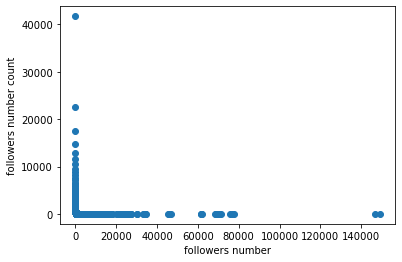

In [32]:
plt.scatter(followers[0], followers[1])
plt.xlabel("followers number")
plt.ylabel("followers number count")
plt.show()

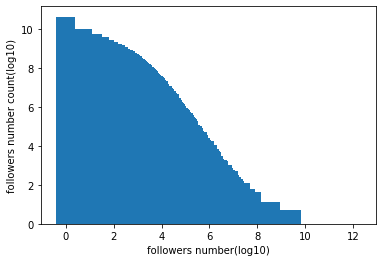

In [18]:
delta = 1
plt.bar(np.log(followers[0]+delta),np.log(followers[1]))
plt.xlabel("followers number(log10)")
plt.ylabel("followers number count(log10)")
plt.show()

In [19]:
list_following_count = list(map(lambda x: len(x.split(",")) if x else 0, 
                                [i for i in user_follow_d["following"]]))

In [20]:
pd.Series(list_following_count).describe()

count    373093.000000
mean         44.894822
std         460.497530
min           0.000000
25%           1.000000
50%           7.000000
75%          26.000000
max       67221.000000
dtype: float64

In [21]:
dict_following_count = {}
for i in list_following_count:
    if i in dict_following_count:
        dict_following_count[i] += 1
    else:
        dict_following_count[i] = 1
        
following_num = np.array(list(dict_following_count.keys())).reshape(-1,1)
following_num_cnt = np.array(list(dict_following_count.values())).reshape(-1,1)
following = np.hstack([following_num,following_num_cnt])
following = pd.DataFrame(following)

In [22]:
following = following.sort_values(by=0)

In [23]:
following

,0,1
0,0,87336
3,1,28354
1,2,19450
7,3,15529
2,4,13231
...,...,...
1043,57146,1
1044,57150,1
1518,67010,1
1519,67012,1


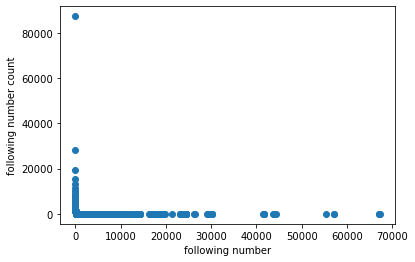

In [33]:
plt.scatter(following[0], following[1])
plt.xlabel("following number")
plt.ylabel("following number count")
plt.show()

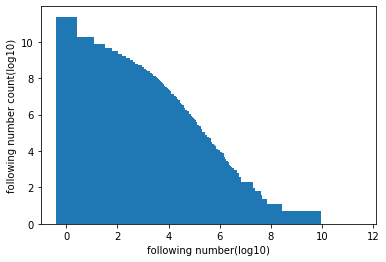

In [25]:
delta = 1
plt.bar(np.log(following[0]+delta),np.log(following[1]))
plt.xlabel("following number(log10)")
plt.ylabel("following number count(log10)")
plt.show()

In [26]:
import networkx as nx

In [27]:
class UserGraph:
    def __init__(self, data):
        self.data = data
        self.vertex, self.edge = self.__to_graph__()
        
    def __to_graph__(self):
        vertex = []
        edge = []
        for database_id, followers, following in self.data.values:
            vertex.append(database_id)
            if followers:
                followers = followers.split(",")
                for follower in followers:
                    if follower not in vertex:
                        vertex.append(follower)
                    e = [follower, database_id]
                    if e not in edge:
                        edge.append(e)
            if following:
                following = following.split(",")
                for i in following:
                    if i not in vertex:
                        vertex.append(i)
                    e = [database_id, i]
                    if e not in edge:
                        edge.append(e)
        return vertex, edge
        

In [28]:
user_graph = UserGraph(user_follow_d[0:100])

In [29]:
e_from = np.array(user_graph.edge)[:,0]
e_to = np.array(user_graph.edge)[:,1]
df = pd.DataFrame({ 'from':e_from, 'to':e_to }) 

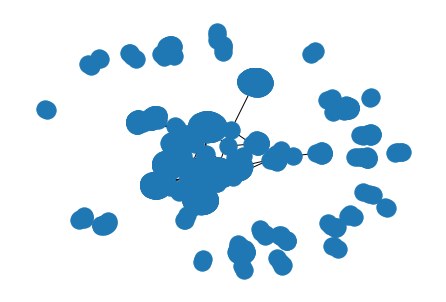

In [30]:
G=nx.from_pandas_edgelist(df, 'from', 'to') 
 
# nx.draw(G, with_labels=True)
nx.draw(G, with_labels=False)
plt.show()

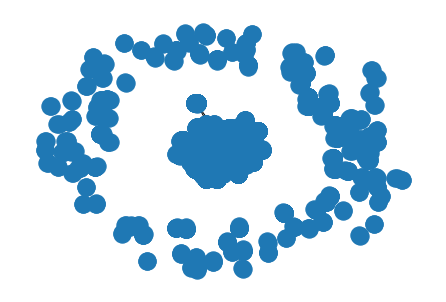

In [34]:
user_graph = UserGraph(user_follow_d[0:1000])
e_from = np.array(user_graph.edge)[:,0]
e_to = np.array(user_graph.edge)[:,1]
df = pd.DataFrame({ 'from':e_from, 'to':e_to }) 
G=nx.from_pandas_edgelist(df, 'from', 'to') 
 
# nx.draw(G, with_labels=True)
nx.draw(G, with_labels=False)
plt.show()